In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [25]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
# rearrange trial number
behAll['trialNumber'].replace(
       [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],
       [2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], inplace=True)

# Find maximum and minimum for each trial
winAmtMax = np.maximum(behAll['winAmtLeft'], behAll['winAmtRight'])
behAll['winAmtMax'] = winAmtMax
winAmtMin = np.minimum(behAll['winAmtLeft'], behAll['winAmtRight'])
behAll['winAmtMin'] = winAmtMin
# Find chosen amount for each trial
chosenAmount = behAll['leftChosen']*behAll['winAmtLeft'] + (1-behAll['leftChosen'])*behAll['winAmtRight'] 
behAll['chosenWinAmt'] = chosenAmount
# Calculate the probability of high amount is chosed or lower amount
behAll['isHighWinAmt'] = chosenAmount>=50
# Calculuate left correct rewarding
leftCorrect = behAll['leftCanBePushed                ']*behAll.pushCorrect + (1-behAll['leftCanBePushed                '])*(1-behAll.pushCorrect)
behAll['leftCorrect'] = leftCorrect

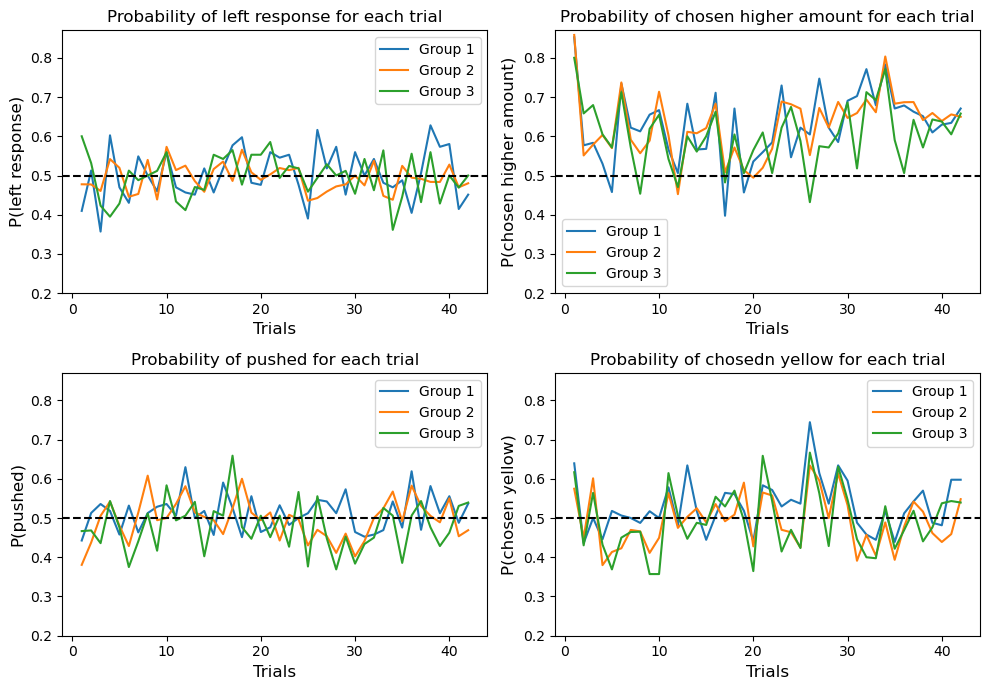

In [9]:
"""This figure shows whether participants has a bias to choise left, pused, yellow chosed or higher amount for each trials.
This results disclose that higher amount is just the only sourse of bias.
The question is that, How and why this bias happened"""


"""Left or right tendency during trials for each group"""
left_groups= behAll.groupby(['group', 'trialNumber'], as_index=False)['leftChosen'].mean()
left_group1 = left_groups[left_groups['group']==1]['leftChosen']
left_group2 = left_groups[left_groups['group']==2]['leftChosen']
left_group3 = left_groups[left_groups['group']==3]['leftChosen']

"""higher and lower amount tendency during trials for each group"""
amt_groups= behAll.groupby(['group', 'trialNumber'], as_index=False)['isHighWinAmt'].mean()
amt_group1 = amt_groups[amt_groups['group']==1]['isHighWinAmt']
amt_group2 = amt_groups[amt_groups['group']==2]['isHighWinAmt']
amt_group3 = amt_groups[amt_groups['group']==3]['isHighWinAmt']


"""push and pull tendency during trials for each group"""
pushed_groups= behAll.groupby(['group', 'trialNumber'], as_index=False)['pushed'].mean()
pushed_group1 = pushed_groups[pushed_groups['group']==1]['pushed']
pushed_group2 = pushed_groups[pushed_groups['group']==2]['pushed']
pushed_group3 = pushed_groups[pushed_groups['group']==3]['pushed']


"""yellow and blue tendency during trials for each group"""
yellow_groups= behAll.groupby(['group', 'trialNumber'], as_index=False)['yellowChosen'].mean()
yellow_group1 = yellow_groups[yellow_groups['group']==1]['yellowChosen']
yellow_group2 = yellow_groups[yellow_groups['group']==2]['yellowChosen']
yellow_group3 = yellow_groups[yellow_groups['group']==3]['yellowChosen']


# plot of probability chosen left during trials
fig = plt.figure(figsize=(10,7), tight_layout=True)
row = 2
column = 2

# probability of left chosen
fig.add_subplot(row, column, 1)
plt.plot(np.arange(1, 43), left_group1)
plt.plot(np.arange(1, 43), left_group2)
plt.plot(np.arange(1, 43), left_group3)
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability of left response for each trial')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(left response)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])
plt.ylim(.2, .87)


# probability of higher amunt chosen
fig.add_subplot(row, column, 2)
plt.plot(np.arange(1, 43), amt_group1)
plt.plot(np.arange(1, 43), amt_group2)
plt.plot(np.arange(1, 43), amt_group3)
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability of chosen higher amount for each trial')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(chosen higher amount)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])
plt.ylim(.2, .87)


# probability of pushed
fig.add_subplot(row, column, 3)
plt.plot(np.arange(1, 43), pushed_group1)
plt.plot(np.arange(1, 43), pushed_group2)
plt.plot(np.arange(1, 43), pushed_group3)
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability of pushed for each trial')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(pushed)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])
plt.ylim(.2, .87)

# probability of yellow choisen
fig.add_subplot(row, column, 4)
plt.plot(np.arange(1, 43), yellow_group1)
plt.plot(np.arange(1, 43), yellow_group2)
plt.plot(np.arange(1, 43), yellow_group3)
plt.axhline(.5, color='black' , linestyle='--')
plt.title('Probability of chosedn yellow for each trial')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('P(chosen yellow)', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])
plt.ylim(.2, .87)

# save
plt.savefig('../figures/feature_bias_trial.png', dpi=300)

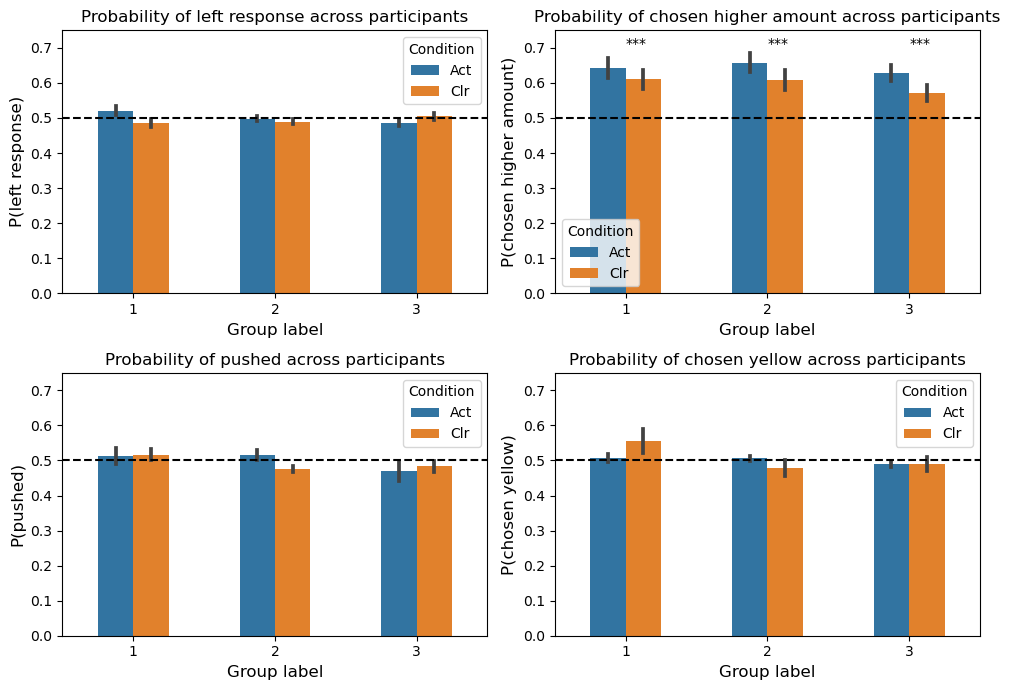

In [17]:
"""The same as the figure above but differnt action and color conditions.
"""

"""Left or right tendency across participant"""
left_groups= behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['leftChosen'].mean()

"""higher and lower amount tendency across participant"""
amt_groups= behAll.groupby(['group', 'block',  'sub_ID'], as_index=False)['isHighWinAmt'].mean()

"""push and pull tendency across participant"""
pushed_groups= behAll.groupby(['group', 'block',  'sub_ID'], as_index=False)['pushed'].mean()

"""yellow and blue tendency across participant"""
yellow_groups= behAll.groupby(['group', 'block',  'sub_ID'], as_index=False)['yellowChosen'].mean()


# plot of probability chosen left during trials
fig = plt.figure(figsize=(10,7), tight_layout=True)
row = 2
column = 2

# Chosen left
fig.add_subplot(row, column, 1)
sn = sns.barplot(data = left_groups, x='group', y='leftChosen', hue='block', width=.5, errorbar="se")
new_title = 'Condition'
sn.legend_.set_title(new_title)
for t, l in zip(sn.legend_.texts,['Act', 'Clr']):
    t.set_text(l)
plt.title('Probability of left response across participants')
plt.xlabel('Group label', fontsize='12')
plt.ylabel('P(left response)', fontsize='12')
plt.axhline(.5, color='black' , linestyle='--')  
plt.ylim(0, .75)

# probability of higher amunt chosen
fig.add_subplot(row, column, 2)
sn = sns.barplot(data = amt_groups, x='group', y='isHighWinAmt', hue='block',  width=.5, errorbar="se")
sn.legend_.set_title(new_title)
for t, l in zip(sn.legend_.texts,['Act', 'Clr']):
    t.set_text(l)
plt.title('Probability of chosen higher amount across participants')
plt.xlabel('Group label', fontsize='12')
plt.ylabel('P(chosen higher amount)', fontsize='12')
plt.axhline(.5, color='black' , linestyle='--')
plt.text(x=0, y=.7, s='***')
plt.text(x=1, y=.7, s='***')
plt.text(x=2, y=.7, s='***')
plt.ylim(0, .75)
 
# probability of pushed
fig.add_subplot(row, column, 3)
sn = sns.barplot(data = pushed_groups, x='group', y='pushed', hue='block',  width=.5, errorbar="se")
sn.legend_.set_title(new_title)
for t, l in zip(sn.legend_.texts,['Act', 'Clr']):
    t.set_text(l)
plt.title('Probability of pushed across participants')
plt.xlabel('Group label', fontsize='12')
plt.ylabel('P(pushed)', fontsize='12')
plt.axhline(.5, color='black' , linestyle='--')
plt.ylim(0, .75)


# probability of yellow choisen
fig.add_subplot(row, column, 4)
sn = sns.barplot(data = yellow_groups, x='group', y='yellowChosen', hue='block',  width=.5, errorbar="se")
sn.legend_.set_title(new_title)
for t, l in zip(sn.legend_.texts,['Act', 'Clr']):
    t.set_text(l)
plt.title('Probability of chosen yellow across participants')
plt.xlabel('Group label', fontsize='12')
plt.ylabel('P(chosen yellow)', fontsize='12')
plt.axhline(.5, color='black' , linestyle='--')
plt.ylim(0, .75)

# save
plt.savefig('../figures/feature_bias_participants.png', dpi=300)

In [6]:
# statsitical test over each figures above
stats.ttest_1samp(amt_groups[(amt_groups['group']==2)&(amt_groups['block']=='Stim')]['isHighWinAmt'], .5)

TtestResult(statistic=3.855807230646891, pvalue=0.0008042450568213844, df=23)

In [82]:
stats.ttest_ind(amt_groups[(amt_groups['group']==3)&(amt_groups['block']=='Stim')]['isHighWinAmt'], 
                amt_groups[(amt_groups['group']==3)&(amt_groups['block']=='Act')]['isHighWinAmt'])

Ttest_indResult(statistic=-1.7539341175079681, pvalue=0.08673680563785392)

In [ ]:
# statsitical test over each figures above
stats.ttest_1samp(amt_groups[amt_groups['group']==3]['isHighWinAmt'], .5)


In [ ]:
behAll['wonAmount                ']

### Correltation of selecting higher amount with the accumulated amount

In [36]:
behAll_wonAmount = behAll.groupby(['group', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_highWinAmt = behAll.groupby(['group', 'sub_ID'], as_index=False)['isHighWinAmt'].mean()
behAll_pushed= behAll.groupby(['group',  'sub_ID'], as_index=False)['pushed'].mean()
behAll_yellowChosen= behAll.groupby(['group',  'sub_ID'], as_index=False)['yellowChosen'].mean()


In [40]:
stats.pearsonr(behAll_wonAmount[behAll_wonAmount['group']==3]['wonAmount                '],
                  behAll_yellowChosen[behAll_yellowChosen['group']==3]['yellowChosen'])


PearsonRResult(statistic=0.05288113604960988, pvalue=0.8152028866106772)

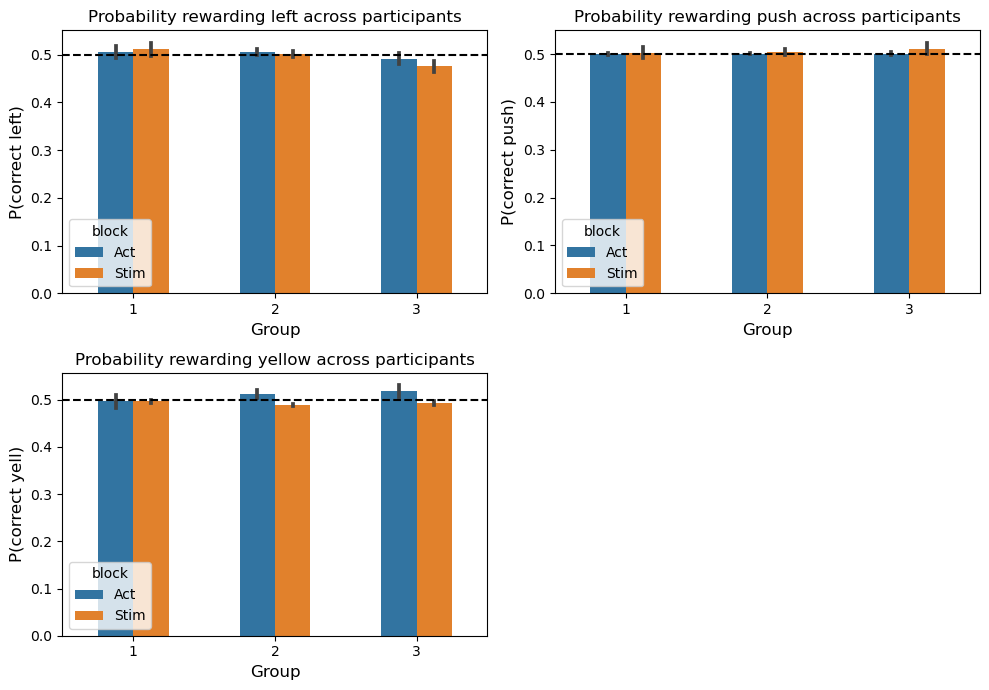

In [24]:
"""Intrinsic tendency between correct left and right, push and pull, yellow and blue across participant.
The result shows that these three factors have no tendency throught the task"""


leftCorrect = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['leftCorrect'].mean()
pushCorrect = behAll.groupby(['group','block', 'sub_ID'], as_index=False)['pushCorrect'].mean()
yellowCorrect = behAll.groupby(['group','block', 'sub_ID'], as_index=False)['yellowCorrect'].mean()

# plot of probability reward in the task design
fig = plt.figure(figsize=(10,7), tight_layout=True)
row = 2
column = 2
 
# rewrading left
fig.add_subplot(row, column, 1)
sns.barplot(data = leftCorrect, x='group', y='leftCorrect', hue='block', width=.5, errorbar="se")
plt.title('Probability rewarding left across participants')
plt.xlabel('Group', fontsize='12')
plt.ylabel('P(correct left)', fontsize='12')
plt.axhline(.5, color='black' , linestyle='--')


# rewarding push
fig.add_subplot(row, column, 2)
sns.barplot(data = pushCorrect, x='group', y='pushCorrect', hue='block', width=.5, errorbar="se")
plt.title('Probability rewarding push across participants')
plt.xlabel('Group', fontsize='12')
plt.ylabel('P(correct push)', fontsize='12')
plt.axhline(.5, color='black' , linestyle='--')


# rewrding pull 
fig.add_subplot(row, column, 3)
sns.barplot(data = yellowCorrect, x='group', y='yellowCorrect', hue='block', width=.5, errorbar="se")
plt.title('Probability rewarding yellow across participants')
plt.xlabel('Group', fontsize='12')
plt.ylabel('P(correct yell)', fontsize='12')
plt.axhline(.5, color='black' , linestyle='--')
 

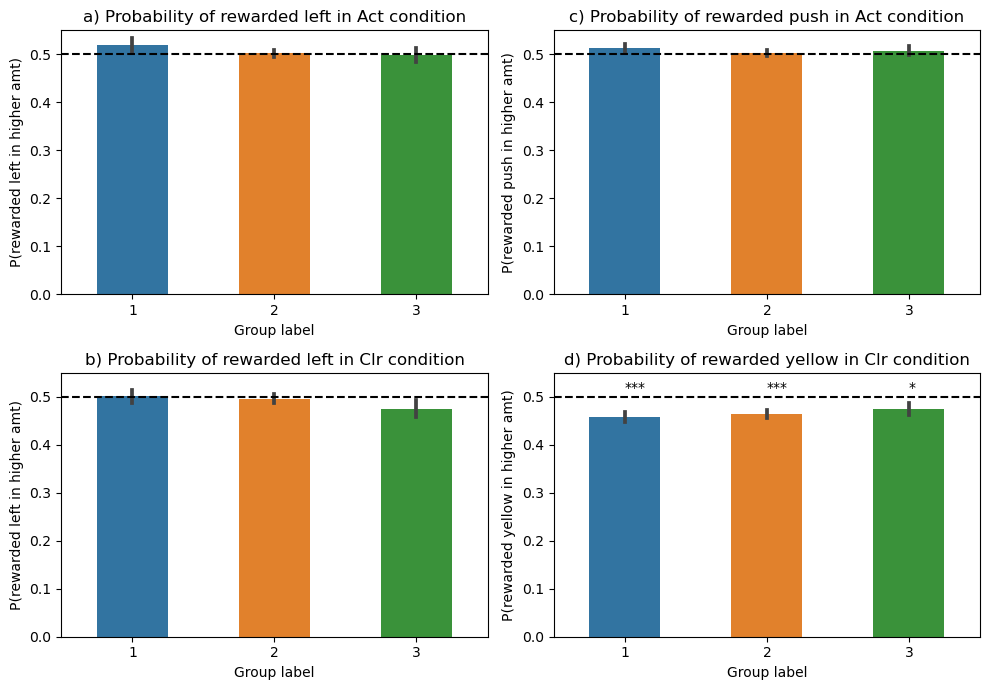

In [26]:
"""Intrinsic reward probability tendency between left and right, push and pull, yellow and blue across participant for each condition
 when higher amount value is chosen. In the other words, the correlation between correct choice with high rewards."""

leftCorrect_act = behAll[(behAll['isHighWinAmt']==1)&(behAll['block']=='Act')].groupby(['group', 'sub_ID'], as_index=False)['leftCorrect'].mean()
pushCorrect_act = behAll[(behAll['isHighWinAmt']==1)&(behAll['block']=='Act')].groupby(['group', 'sub_ID'], as_index=False)['pushCorrect'].mean()

leftCorrect_stim = behAll[(behAll['isHighWinAmt']==1)&(behAll['block']=='Stim')].groupby(['group', 'sub_ID'], as_index=False)['leftCorrect'].mean()
yellowCorrect_stim = behAll[(behAll['isHighWinAmt']==1)&(behAll['block']=='Stim')].groupby(['group', 'sub_ID'], as_index=False)['yellowCorrect'].mean()


# plot of probability reward in the task design
fig = plt.figure(figsize=(10,7), tight_layout=True)
row = 2
column = 2
 
# rewrading left
fig.add_subplot(row, column, 1)
sns.barplot(data = leftCorrect_act, x='group', y='leftCorrect',  width=.5, errorbar="se")
plt.title('a) Probability of rewarded left in Act condition')
plt.xlabel('Group label', fontsize='10')
plt.ylabel('P(rewarded left in higher amt)', fontsize='10')
plt.axhline(.5, color='black' , linestyle='--')
plt.ylim(0, .55)

# rewarding push
fig.add_subplot(row, column, 2)
sns.barplot(data = pushCorrect_act, x='group', y='pushCorrect',  width=.5, errorbar="se")
plt.title('c) Probability of rewarded push in Act condition')
plt.xlabel('Group label', fontsize='10')
plt.ylabel('P(rewarded push in higher amt)', fontsize='10')
plt.axhline(.5, color='black' , linestyle='--')
plt.ylim(0, .55)
 
# rewrding pull 
fig.add_subplot(row, column, 3)
sns.barplot(data = leftCorrect_stim, x='group', y='leftCorrect',  width=.5, errorbar="se")
plt.title('b) Probability of rewarded left in Clr condition')
plt.xlabel('Group label', fontsize='10')
plt.ylabel('P(rewarded left in higher amt)', fontsize='10')
plt.axhline(.5, color='black' , linestyle='--')
plt.ylim(0, .55)
 
# rewrding pull 
fig.add_subplot(row, column, 4)
sns.barplot(data = yellowCorrect_stim, x='group', y='yellowCorrect',  width=.5, errorbar="se")
plt.text(x=0, y=.51, s='***')
plt.text(x=1, y=.51, s='***')
plt.text(x=2, y=.51, s='*')
plt.title('d) Probability of rewarded yellow in Clr condition')
plt.xlabel('Group label', fontsize='10')
plt.ylabel('P(rewarded yellow in higher amt)', fontsize='10')
plt.axhline(.5, color='black' , linestyle='--')
plt.ylim(0, .55)
plt.ylim(0, .55)

plt.savefig('../figures/rewarded_options_amount.png', dpi=300)

In [55]:
stats.ttest_1samp(yellowCorrect_stim[yellowCorrect_stim['group']==2]['yellowCorrect'], .5)

TtestResult(statistic=-4.489216830300164, pvalue=0.00016628327976157727, df=23)

In [58]:
stats.ttest_1samp(pushCorrect_act[pushCorrect_act['group']==3]['pushCorrect'], .5)

TtestResult(statistic=0.8333195135125746, pvalue=0.41404255369485254, df=21)

In [61]:
stats.ttest_1samp(leftCorrect_act[leftCorrect_act['group']==2]['leftCorrect'], .5)

TtestResult(statistic=0.3026761862134743, pvalue=0.7648571370799874, df=23)

In [67]:
stats.ttest_1samp(leftCorrect_stim[leftCorrect_stim['group']==3]['leftCorrect'], .5)

TtestResult(statistic=-1.4346445115124251, pvalue=0.16611404493736645, df=21)